In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from data_structures.cfr_trees import CFRTree, CFRJointStrategy
from games.kuhn import build_kuhn_tree
from cfr_code.sample_cfr import SolveWithSampleCFR
from utilities.graphs import graphs_from_cfr_results, epsilon_graph

In [30]:
kuhn_tree = build_kuhn_tree(3, 4)

In [31]:
cfr_tree = CFRTree(kuhn_tree)

In [32]:
%time res = SolveWithSampleCFR(cfr_tree, 100000, checkEveryIteration = 1000, bootstrap_iterations = 10000, \
                               show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
CPU times: user 1min 55s, sys: 28 ms, total: 1min 55s
Wall time: 1min 55s


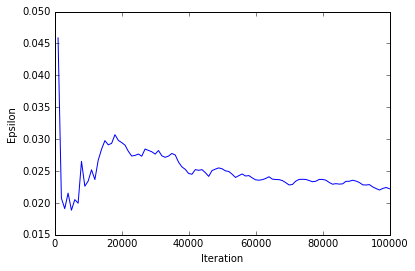

In [33]:
epsilon_graph(res)

In [27]:
res['utility']

[-0.04674999999999997, -0.003708333333333307, 0.05045833333333337]

# Kuhn equilibrium plans interpretation

In [ ]:
from data_structures.cfr_trees import CFRJointStrategy

In [ ]:
big_plans = list(map(lambda el: (CFRJointStrategy.stringToActionPlan(el[0]), el[1]), 
                     filter(lambda el: el[1] > 0, res['joint'].plans.items())))
print("There are " + str(len(big_plans)) + " big plans")
print("They cover " + str(sum(map(lambda el: el[1], big_plans)) / res['joint'].frequencyCount * 100) + 
      "% of samples")

In [ ]:
def kuhn_tree_traverse_via_action_plan(node, action_plan):
    if(node.isChance()):
        results = []
        for i in range(len(node.children)):
            r = node.actionNames[i] + " - " + kuhn_tree_traverse_via_action_plan(node.children[i], action_plan)
            results.append(r)
        return results
    
    if(node.isLeaf()):
        return ""
    
    a = action_plan[node.information_set]
    action_name = node.actionNames[a]
    return action_name + " - " + kuhn_tree_traverse_via_action_plan(node.children[a], action_plan)

In [ ]:
plans = {}
total_frequency = res['joint'].frequencyCount
for p in big_plans:
    for s in kuhn_tree_traverse_via_action_plan(kuhn_tree.root, p[0]):
        #print(s + str(p[1]))
        if(s in plans):
            plans[s] += p[1] / total_frequency
        else:
            plans[s] = p[1] / total_frequency

In [ ]:
to_del = []
for (p, f) in plans.items():
    if(f < 0.01):
        to_del.append(p)
for p in to_del:
    del plans[p]
plans